# Etapa 2: Pré processamento dos dados

In [4]:
# Importação das bibliotecas
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Caminhos para dados e rótulos
DATA_DIR = "../data/FairFace"
LABELS_PATH = "../data/FairFace/train_labels.csv"

# Carregar DataFrame
df = pd.read_csv(LABELS_PATH)
print("Total de imagens no CSV de treino:", len(df))
df.head()

Total de imagens no CSV de treino: 86744


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


Idade: 50-59


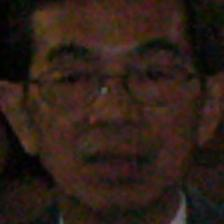

Idade: 30-39


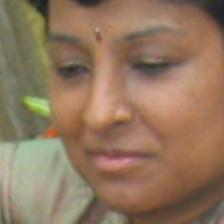

Idade: 3-9


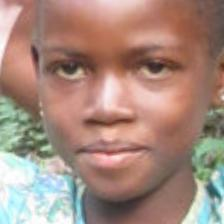

In [5]:
# Visulização de algumas imagens para validação manual
from PIL import Image
from IPython.display import display

for i in range(3):
    img_path = os.path.join(DATA_DIR, df['file'].iloc[i])
    img = Image.open(img_path)
    print(f"Idade: {df['age'].iloc[i]}")
    display(img)

# Conversão dos rótulos em categorias

O modelo espera que os rótulos de faixa etária estejam em formato categórico, então o ImageDataGenerator faz essa conversão ao usar class_mode='categorical'.

# Normalização de pixels

Além disso, as imagens devem ter os pixels normalizados entre 0 e 1. Para isso, utilizamos o parâmetro rescale=1./255.
Esta etapa ajuda na estabilidade do treinamento.

# Divisão entre treino e validação
Embora os dados baixados via Kaggle já estejam divididos entre treino (88%) e validação (12%) como visto na etapa de análise exploratória, contudo é uma boa prática de desenvolvimento re-dividir o conjunto de treinamento para fazer validação interna.
A ideia é testar o modelo final utilizando o conjunto de validação (não utilizado agora) como uma validação final.

Para fazer a divisão de forma automática e rápida, o ImageDataGenerator também permite com o parâmetro validation_split.

In [6]:
# Criar o gerador de imagens com normalização e split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# Redimensionamento de imagens

É importante na etapa de pre-processamento garantir que todas as imagens estejam padronizadas no tamanho de entrada, portanto é importante redimensioná-las para um tamanho fixo. 

O tamanho de 224x224 pixels é comum para redes pré-treinadas.

In [7]:
# Criar o gerador de treino
train_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=DATA_DIR,
    x_col='file',
    y_col='age',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='training',
    seed=42
)

Found 78070 validated image filenames belonging to 9 classes.


In [8]:
# Criar o gerador de validação
val_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=DATA_DIR,
    x_col='file',
    y_col='age',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='validation',
    seed=42
)

Found 8674 validated image filenames belonging to 9 classes.


# Visualização de imagens para validação visual

Esta não é uma etapa mandatória, porém é interessante visualizarmos as imagens após o pré-processamento pra validar que as mesmas estão sendo carregadas corretamente e as faixas etárias (que é classe a prever) está sendo mapeada de forma correta.

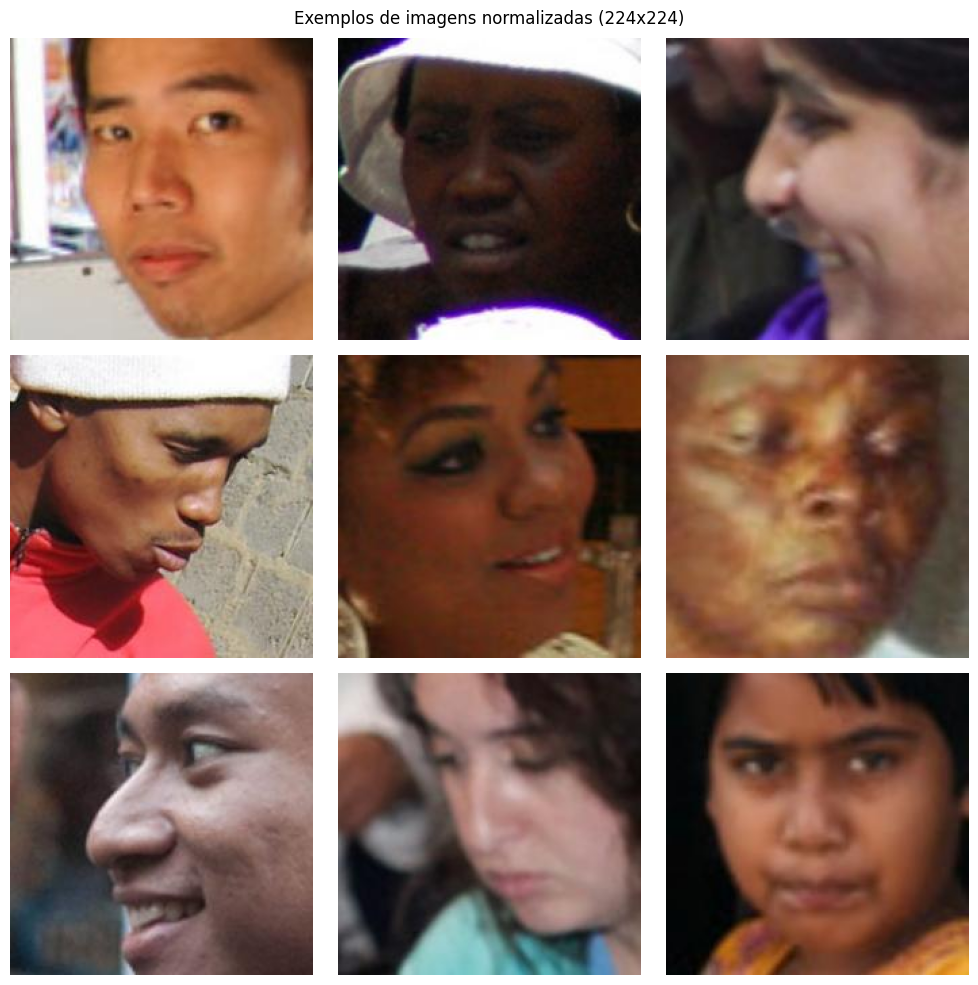

In [9]:
# Visualizar um batch de imagens do gerador de treino
images, labels = next(train_gen)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle("Exemplos de imagens normalizadas (224x224)")
plt.tight_layout()
plt.show()